        Data Science: A Programming Approach
        Individual Project 1
        
        Sundesh Raj
        1001633297
        University of Texas Arlington

<h1 align='center' style="color: blue;">Titanic: Machine Learning from Disaster</h1>

<p><b>External References and Citations</b></p>

<ul>
    <li><a href='https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8'>Predicting the Survival of Titanic Passengers</a></li>
    <li><a href='https://www.kaggle.com/c/titanic/overview/evaluation'>Kaggle Titanic Disaster Prediction</a></li>
    <li><a href='https://github.com/PRASHANTTZ/Titanic-Machine-Learning-from-Disaster/blob/master/TitanicPrediction.ipynb'>Titanic Prediction</a></li>
</ul>

<p>Required Imports</p>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

<p><b>Importing the training and test data</b></p>

In [2]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
titanicData = [trainData, testData]

In [3]:
print(trainData.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p>From the above table we can see that the value for age column varies from ~0.4 to 80</p>

In [8]:
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<p><b>Checking the missing values like NAN and blank values</b></p>

In [9]:
total = trainData.isnull().sum().sort_values(ascending=False)
percent_1 = trainData.isnull().sum()/trainData.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


<p>From the above table we can see that the Embarked feature has only 2 values missing so it can be rectified. The main concer here is the Cabin feature which has almost 77% missing or NAN values, if we think this feature is not of great importance we can completely drop the table or replace with a different straight for feature.</p>
<p>The Age feature also has 177 missing values which constitutes to about 20% missing values</p>

In [10]:
trainData.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<p><b>If we combine SibSp and Parch as a combined feature we could further simplify the feature set. This would show if a passenger aboard has anyone along with them as companions travelling together. We combine SibSp and Parch to form a new feature named "hasCompanion"</b></p>

In [11]:
titanicData = [trainData, testData]
for val in titanicData:
    val['relatives'] = val['SibSp'] + val['Parch']
    val.loc[val['relatives'] > 0, 'hasCompanion'] = 0
    val.loc[val['relatives'] == 0, 'hasCompanion'] = 1
    val['hasCompanion'] = val['hasCompanion'].astype(int)
    
trainData['hasCompanion'].value_counts()

1    537
0    354
Name: hasCompanion, dtype: int64

## Data Preprocessing 

<p>We can drop the Passenger ID feature from the training data set since it does not help in training the model for the prediction of survivors. We can retain the Passenger ID feature in the test data set only</p>

In [12]:
trainData = trainData.drop(['PassengerId'], axis=1)

### Replacing missing data

<p>As seen earlier the Cabin feature has almost 77% missing data. From the data set we can see that the alphabets in the Cabin feature values actually represent the entrance deck for that particular cabin. Hence below we assign the alphabets as deck names and give them integer values as it simplifies the process of training the model.</p>

In [13]:
# Cabin column
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
titanicData = [trainData, testData]

for val in titanicData:
    val['Cabin'] = val['Cabin'].fillna("U0")
    val['Deck'] = val['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    val['Deck'] = val['Deck'].map(deck)
    val['Deck'] = val['Deck'].fillna(0)
    val['Deck'] = val['Deck'].astype(int)
    
trainData = trainData.drop(['Cabin'], axis=1)
testData = testData.drop(['Cabin'], axis=1)

In [14]:
trainData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,hasCompanion,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


<p>We have also seen the number of missing values in the Age feature. We can use the mean and standard deviation to compute values for the missing fields</p>

In [15]:
# Age column
data = [trainData, testData]
for dataset in data:
    mean = trainData["Age"].mean()
    std = testData["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = trainData["Age"].astype(int)
trainData["Age"].isnull().sum()

0

In [16]:
# Embarked column
trainData['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<p>We have also seen that the Embarked feature had only 2 missing values. From the above table we can see that the most freqent Embarked value is S. Thus, we replace the 2 missing values with 'S'</p>

In [17]:
defaultEmbarked = 'S'
titanicData = [trainData, testData]

for val in titanicData:
    val['Embarked'] = val['Embarked'].fillna(defaultEmbarked)

In [18]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null int32
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
relatives       891 non-null int64
hasCompanion    891 non-null int32
Deck            891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


### Converting Features

<p>We convert the Fare feature to integer type for easier model training</p>

In [19]:
# Converting the 'Fare' from float to int64, using the “astype()”
titanicData = [trainData, testData]

for val in titanicData:
    val['Fare'] = val['Fare'].fillna(0)
    val['Fare'] = val['Fare'].astype(int)

<p><b>Name is one of the categorical feature available in the given data set. Below we get the title for the names provided and replace them with more accurate values</b></p>

In [20]:
titanicData = [trainData, testData]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for val in titanicData:
    val['Title'] = val.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    val['Title'] = val['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    val['Title'] = val['Title'].replace('Mlle', 'Miss')
    val['Title'] = val['Title'].replace('Ms', 'Miss')
    val['Title'] = val['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    val['Title'] = val['Title'].map(titles)
    # filling NaN with 0, to get safe
    val['Title'] = val['Title'].fillna(0)
    
trainData = trainData.drop(['Name'], axis=1)
testData = testData.drop(['Name'], axis=1)

<p>Below we can see that we convert the male and female categorical values for gender to numeric for easier values for model training</p>

In [21]:
# Convert 'Sex' feature to numeric
genders = {"male": 0, "female": 1}
titanicData = [trainData, testData]

for val in titanicData:
    val['Sex'] = val['Sex'].map(genders)

In [22]:
# 'Ticket' feature 
trainData['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

<p>As seen in the above description, the Ticket feature has too many different values for us to categorize and extract a new meaningful feature from it. Hence, we drop the Ticket feature from our data set</p>

In [23]:
trainData = trainData.drop(['Ticket'], axis=1)
testData = testData.drop(['Ticket'], axis=1)

<p>Below we conver the Embarked categorical data into numeric</p>

In [24]:
# Convert ‘Embarked’ feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
titanicData = [trainData, testData]

for val in titanicData:
    val['Embarked'] = val['Embarked'].map(ports)

## Creating Categories 

<p>As seen earlier Age is has values ranging from 0.4 to 80.0, first step here is to conver the float values to int. Once we accomplish this task we can categories certain age ranges into a single feature value and and replace them in the dataset</p>

In [25]:
titanicData = [trainData, testData]

for val in titanicData:
    val['Age'] = val['Age'].astype(int)
    val.loc[ val['Age'] <= 11, 'Age'] = 0
    val.loc[(val['Age'] > 11) & (val['Age'] <= 18), 'Age'] = 1
    val.loc[(val['Age'] > 18) & (val['Age'] <= 22), 'Age'] = 2
    val.loc[(val['Age'] > 22) & (val['Age'] <= 27), 'Age'] = 3
    val.loc[(val['Age'] > 27) & (val['Age'] <= 33), 'Age'] = 4
    val.loc[(val['Age'] > 33) & (val['Age'] <= 40), 'Age'] = 5
    val.loc[(val['Age'] > 40) & (val['Age'] <= 66), 'Age'] = 6
    val.loc[ val['Age'] > 66, 'Age'] = 6
    
trainData['Age'].value_counts()

6    164
5    159
4    158
3    138
2    114
1     90
0     68
Name: Age, dtype: int64

<p><b>As seen above for the Age feature, we do something similar with the Fare feature, firstly we convert the float values to int, and further we categorize the range in fares and assign new integer values representing a particular range, and we replace them in the dataset</b><p>

In [26]:
trainData.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,hasCompanion,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [27]:
titanicData = [trainData, testData]

for val in titanicData:
    val.loc[ val['Fare'] <= 7.91, 'Fare'] = 0
    val.loc[(val['Fare'] > 7.91) & (val['Fare'] <= 14.454), 'Fare'] = 1
    val.loc[(val['Fare'] > 14.454) & (val['Fare'] <= 31), 'Fare']   = 2
    val.loc[(val['Fare'] > 31) & (val['Fare'] <= 99), 'Fare']   = 3
    val.loc[(val['Fare'] > 99) & (val['Fare'] <= 250), 'Fare']   = 4
    val.loc[ val['Fare'] > 250, 'Fare'] = 5
    val['Fare'] = val['Fare'].astype(int)

## Creating new Features

In [28]:
# Age times class
titanicData = [trainData, testData]

for val in titanicData:
    val['Age_Class']= val['Age']* val['Pclass']

In [29]:
# Fare per person
for val in titanicData:
    val['Fare_Per_Person'] = val['Fare']/(val['relatives']+1)
    val['Fare_Per_Person'] = val['Fare_Per_Person'].astype(int)

trainData.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,hasCompanion,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [30]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,hasCompanion,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,8,1,6,0
1,893,3,1,5,1,0,0,0,1,0,8,3,15,0
2,894,2,0,3,0,0,1,2,0,1,8,1,6,1
3,895,3,0,5,0,0,1,0,0,1,8,1,15,1
4,896,3,1,5,1,1,1,0,2,0,8,3,15,0


## Creating our Machine Learning models

In [31]:
X_train = trainData.drop("Survived", axis=1)
Y_train = trainData["Survived"]
X_test = testData.drop(["PassengerId"], axis=1).copy()
# here we do not have Y_test since the test data set does not contain the target class (Survived)

<p><b>Logistic Regression</b></p>

In [32]:
logregModel = LogisticRegression()
logregModel.fit(X_train, Y_train)

lr_y_hat = logregModel.predict(X_test)

lr_acc = round(logregModel.score(X_train, Y_train) * 100, 2)
print("Logistic Regression Accuracy : {}".format(lr_acc))

Logistic Regression Accuracy : 81.48


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<p>Below we output the resulting prediction for Logistic Regression to a csv file and save it int the ./submission folder</p>

In [33]:
logRegResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": lr_y_hat
    })
logRegResult.to_csv('./submission/LR_Result.csv', index=False)
# 3023

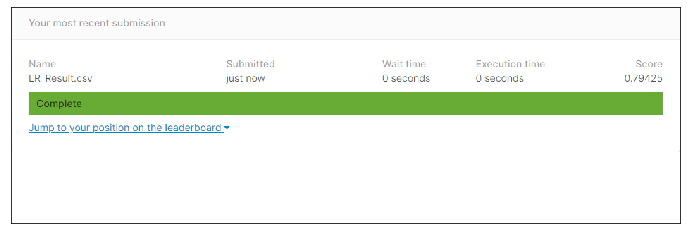

In [35]:
logRegScoreImage = np.array(mpimg.imread('./ResultImages/LogisticScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(logRegScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 4th submission on Kaggle. As seen from the image above the Logistic Regression score obtained from kaggle.com was 0.79425. So far this has been the best score and resulting in a rank of 3023 at the time of submission.</p>

<p><b>Stochastic Gradient Descent</b></p>

In [36]:
sgdModel = SGDClassifier(max_iter=5, tol=None)
sgdModel.fit(X_train, Y_train)
sgd_y_hat = sgdModel.predict(X_test)

sgd_acc = round(sgdModel.score(X_train, Y_train) * 100, 2)
print("Stochastic Gradient Descent Accuracy : {}".format(sgd_acc))

Stochastic Gradient Descent Accuracy : 73.06


<p>Below we output the resulting prediction for SGD Classifier to a csv file and save it int the ./submission folder</p>

In [37]:
SGDResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": sgd_y_hat
    })
SGDResult.to_csv('./submission/SGD_Result.csv', index=False)
# ~16900

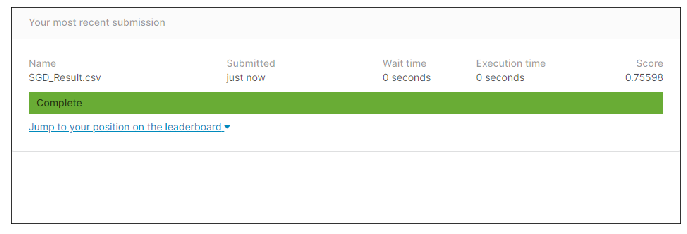

In [38]:
SGDScoreImage = np.array(mpimg.imread('./ResultImages/SGD.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(SGDScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 3rd submission. The score obtained from Kaggle.com was 0.75598, and the rank was unchanged after the 2nd submission which was around ~16900</p>

<p><b>Gaussian Naive Bayes</b></p>

In [39]:
gsModel = GaussianNB() 
gsModel.fit(X_train, Y_train)  
gs_y_hat = gsModel.predict(X_test)

gs_acc = round(gsModel.score(X_train, Y_train) * 100, 2)
print("Gaussian Naive Bayes Accuracy : {}".format(gs_acc))

Gaussian Naive Bayes Accuracy : 77.78


<p>Below we output the resulting prediction for Gaussian Naive Bayes Classifier to a csv file and save it int the ./submission folder</p>

In [40]:
gsResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": gs_y_hat
    })
gsResult.to_csv('./submission/Gaussian_Result.csv', index=False)
# ~18300

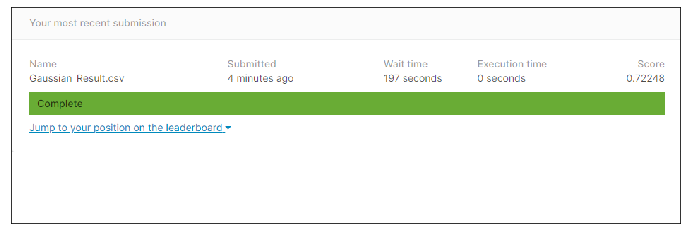

In [41]:
gsScoreImage = np.array(mpimg.imread('./ResultImages/GaussianScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(gsScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the first submission, the score obtained from Kaggle.com for Gaussian result was 0.72248. Here i got a first ranking of around ~18300 at the time of submission</p>

<p><b>Random Forest</b></p>

In [42]:
rfModel = RandomForestClassifier(n_estimators=100)
rfModel.fit(X_train, Y_train)
rf_y_hat = rfModel.predict(X_test)

rf_acc = round(rfModel.score(X_train, Y_train) * 100, 2)
print("Random Forest Accuracy : {}".format(rf_acc))

Random Forest Accuracy : 92.82


<p>Below we output the resulting prediction for Random Forest Classifier to a csv file and save it int the ./submission folder</p>

In [43]:
rfResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": rf_y_hat
    })
rfResult.to_csv('./submission/RandomForest_Result.csv', index=False)

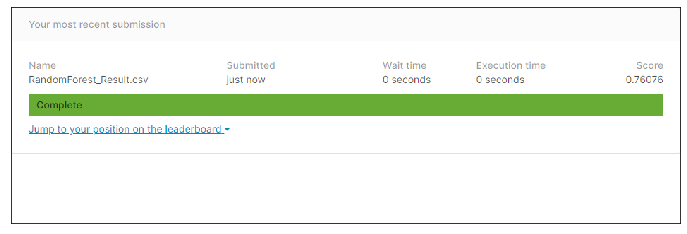

In [44]:
rfScoreImage = np.array(mpimg.imread('./ResultImages/RFScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(rfScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 7th submission. The score obtained for Random Forest result from Kaggle.com was 0.76075. Which was not better than the Logistic Regression result and hence the rank remained unchanged at the time of submission at 3023</p>

<p><b>K Nearest Neighbour</b></p>

In [45]:
knnModel = KNeighborsClassifier(n_neighbors = 5) 
knnModel.fit(X_train, Y_train)  
knn_y_hat = knnModel.predict(X_test)

knn_acc = round(knnModel.score(X_train, Y_train) * 100, 2)
print("K Nearest Neighbour Accuracy : {}".format(knn_acc))

K Nearest Neighbour Accuracy : 85.63


<p>Below we output the resulting prediction for KNN Classifier to a csv file and save it int the ./submission folder</p>

In [46]:
KNNResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": knn_y_hat
    })
KNNResult.to_csv('./submission/KNN_Result.csv', index=False)
# ~ still 3023

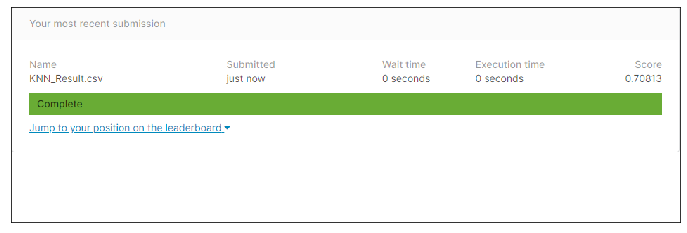

In [47]:
knnScoreImage = np.array(mpimg.imread('./ResultImages/KNNScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(knnScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 6th submission. The score obtained for KNN result from Kaggle.com was 0.70813. The rank remained unchanged after submission at 3023 at the time of submission</p>

<p><b>Decision Tree Classifier</b></p>

In [48]:
dtModel = DecisionTreeClassifier() 
dtModel.fit(X_train, Y_train) 
dt_y_hat = dtModel.predict(X_test)

dt_acc = round(dtModel.score(X_train, Y_train) * 100, 2)
print("Decision Tree Classifier Accuracy : {}".format(dt_acc))

Decision Tree Classifier Accuracy : 92.82


<p>Below we output the resulting prediction for Decision Tree classifier to a csv file and save it int the ./submission folder</p>

In [49]:
dtResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": dt_y_hat
    })
dtResult.to_csv('./submission/DecisionTree_Result.csv', index=False)

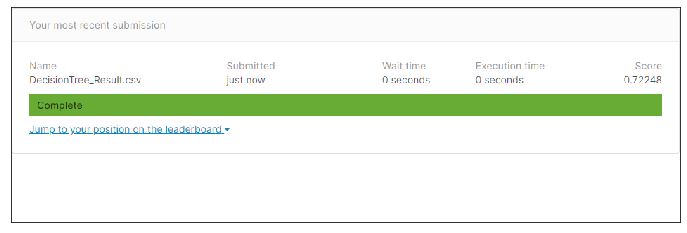

In [50]:
dtScoreImage = np.array(mpimg.imread('./ResultImages/DTScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(dtScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the final submission. The score obtained for Decision tree result on Kaggle.com was 0.72248 which was not better than the Logistic Regression score and hence the rank remained unchanged at 3023 at the time of submission</p>

<p><b>SVC Classifier</b></p>

In [51]:
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
svc_y_hat = svcModel.predict(X_test)

svc_acc = round(svcModel.score(X_train, Y_train) * 100, 2)
print("Linear SVC Classifier Accuracy : {}".format(svc_acc))

Linear SVC Classifier Accuracy : 81.37


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<p>Below we output the resulting prediction for Linear SVC Classifier to a csv file and save it int the ./submission folder</p>

In [52]:
SVCResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": svc_y_hat
    })
SVCResult.to_csv('./submission/SVC_Result.csv', index=False)
# ~3023

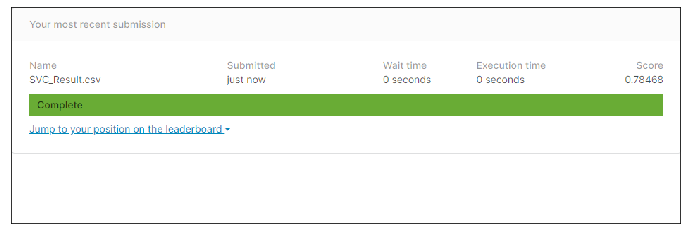

In [53]:
svcScoreImage = np.array(mpimg.imread('./ResultImages/SVCScore.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(svcScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 5th submission. The score obtained for SVC result was 0.78468, which was very close to the Logistic regression score, but still not better to change the rank hence, the rank remained unchanged at 3023 at the time of submission</p>

<p><b>Perceptron Neural Network</b></p>

In [54]:
pModel = Perceptron(max_iter=5)
pModel.fit(X_train, Y_train)
p_y_hat = pModel.predict(X_test)

p_acc = round(pModel.score(X_train, Y_train) * 100, 2)
print("Perceptron Neural Network Accuracy : {}".format(p_acc))

Perceptron Neural Network Accuracy : 80.13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<p>Below we output the resulting prediction for Perceptron Neural Network to a csv file and save it int the ./submission folder</p>

In [55]:
perceptronResult = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": p_y_hat
    })
perceptronResult.to_csv('./submission/Perceptron_Result.csv', index=False)
# ~16900

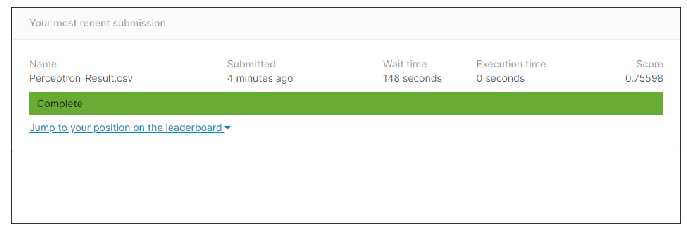

In [56]:
pScoreImage = np.array(mpimg.imread('./ResultImages/Perceptron.png'))
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(pScoreImage)
ax.set(xticks=[], yticks=[])

plt.show()

<p>This was the 2nd submission after gaussian. The score obtained was 0.75598 which was better than the gaussian result and hence the ranking improved to around ~16900</p>

## Comparing the Models

In [58]:
modelRanks = pd.DataFrame({
    'Model':["Linear SVC", "K-NN", "Logistic Regression", "Gaussian Naive Bayes", "Decision Tree", "Stochastic Gradient Descent",
            "Random Forest", "Perceptron Neural Network"],
    'Score': [0.78468, 0.70813, 0.79425, 0.72248, 0.72248, 0.75598, 0.76075, 0.75598]})
result_df = modelRanks.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.79425,Logistic Regression
0.78468,Linear SVC
0.76075,Random Forest
0.75598,Stochastic Gradient Descent
0.75598,Perceptron Neural Network
0.72248,Gaussian Naive Bayes
0.72248,Decision Tree
0.70813,K-NN


<p><b>From the above table we can see that the KNN predictions gave us the lowest score on Kaggle and the Logistic Regression predictions gave the best score among all</b></p>